In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from pandas import Series
! pip install -U kaleido

In [3]:
df = pd.read_csv(r'C:\Users\ACER\Uberlyft_data.csv')
print (type(df))

<class 'pandas.core.frame.DataFrame'>


In [16]:
df = pd.read_csv(r'C:\Users\ACER\Uberlyft_data.csv')
print (df)

                                          id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          ti

In [17]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [18]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [19]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [20]:
df.shape

(693071, 57)

In [21]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [23]:
df['datetime']=pd.to_datetime(df['datetime'])

In [24]:
df.isnull().sum().sum()

55095

In [25]:
df.dropna(axis=0,inplace=True)

In [26]:
df.isnull().sum().sum()

0

# Data Manipulation & Vizualisation

In [27]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

In [28]:
#count the occurences of a value in a column
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [29]:
day_count =df.groupby(by=["day"]).size().reset_index(name="counts")
day_count

,day,counts
0,1,41680
1,2,41298
2,3,41323
3,4,11627
4,9,1529
5,10,2534
6,13,35496
7,14,41344
8,15,41332
9,16,41359


In [30]:
import plotly.express as px
day_count=df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=day_count, x="day", y="counts", color="cab_type", barmode="group")
# It seems we have many gaps in our 'day' data. we don't have data from 18th day until 25th day in each month.

In [31]:
#Sort the values by the column cab_type
df.sort_values("cab_type",inplace = True, ascending = False)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
346401,dfd16807-be21-4d7a-80f1-e53b2f5a561a,1.543403e+09,11,28,11,2018-11-28 11:06:24,America/New_York,North End,Financial District,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
390693,0ecfb69d-b819-4cc6-a869-649fee0ebd4c,1.544872e+09,11,15,12,2018-12-15 11:05:07,America/New_York,Beacon Hill,Haymarket Square,Uber,...,0.0075,1544893200,39.78,1544929200,54.40,1544896800,36.64,1544929200,53.73,1544896800
390691,d04c979a-3d24-4422-87bb-bc1bfe9a4ffe,1.544872e+09,11,15,12,2018-12-15 11:05:07,America/New_York,South Station,Financial District,Uber,...,0.0075,1544893200,39.78,1544929200,54.40,1544896800,36.64,1544929200,53.73,1544896800
390690,6f918875-3929-4ad5-9e7e-964bb4843a1f,1.544915e+09,23,15,12,2018-12-15 23:00:11,America/New_York,South Station,Financial District,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
390689,6bf685e6-e105-45ea-b408-dc65b4628843,1.544915e+09,23,15,12,2018-12-15 23:00:11,America/New_York,South Station,Financial District,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411458,3f1207b7-a95c-459b-8dc6-314fae822e18,1.543366e+09,0,28,11,2018-11-28 00:48:22,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
411457,3ed73044-1b09-430d-962a-2fef618bb9cd,1.544672e+09,3,13,12,2018-12-13 03:25:10,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0000,1544634000,22.22,1544673600,37.92,1544637600,17.83,1544673600,30.42,1544637600
411456,2d398417-338d-4028-8450-80a9a250ba97,1.544672e+09,3,13,12,2018-12-13 03:25:10,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0000,1544634000,22.22,1544673600,37.92,1544637600,17.83,1544673600,30.42,1544637600
411455,14773ab3-6b99-421f-b48c-9e18e0052bfe,1.544672e+09,3,13,12,2018-12-13 03:25:10,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0000,1544634000,22.22,1544673600,37.92,1544637600,17.83,1544673600,30.42,1544637600


In [32]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [33]:
# so our average mean is 16.54 but our maximum price is 97.5. so there is an possible outlier so dropping the max price. So, removed outlier from price

In [34]:
df[['price']].mean(axis=0)

price    16.545125
dtype: float64

In [35]:
df = df.loc[df['price']!=df.price.max()]

In [36]:
# moving forward, I will be checking correlation between different set of variables with our target variables.
#checking correlation of all the tempearture variables with target variable price

In [37]:
Correlationmatrix = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']].corr()

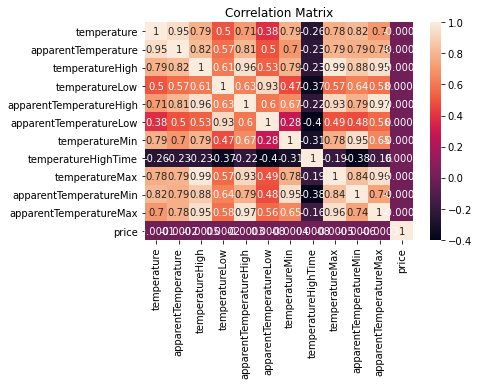

In [38]:
Correlationmatrix = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']].corr().round(4)
sns.heatmap(Correlationmatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [39]:
#So all the tempearture related variables have weak correlation with the target variable price

In [40]:
df1=df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)

In [41]:
df1.shape

(637975, 46)

In [47]:
df1.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureLowTime', 'apparentTemperatureHighTime',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'],
      dtype='object')

In [43]:
#similarly with climate features

In [48]:
Correlationmatrix = df[['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']].corr()

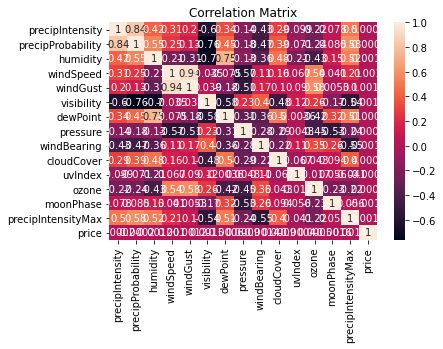

In [49]:
Correlationmatrix = df[['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']].corr().round(4)
sns.heatmap(Correlationmatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [50]:
df2=df1.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)

In [51]:
df2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'long_summary', 'windGustTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'],
      dtype='object')

In [52]:
df2.shape

(637975, 32)

In [53]:
df3 = df2.select_dtypes(include=['object','category']).columns.tolist()
for column in df[df3]:
    print(f'{column} : {df2[column].unique()}')
    print()

id : ['dfd16807-be21-4d7a-80f1-e53b2f5a561a'
 '0ecfb69d-b819-4cc6-a869-649fee0ebd4c'
 'd04c979a-3d24-4422-87bb-bc1bfe9a4ffe' ...
 '2d398417-338d-4028-8450-80a9a250ba97'
 '14773ab3-6b99-421f-b48c-9e18e0052bfe'
 '424553bb-7174-41ea-aeb4-fe06d4f4b9d7']

timezone : ['America/New_York']

source : ['North End' 'Beacon Hill' 'South Station' 'Theatre District' 'Fenway'
 'West End' 'Haymarket Square' 'Northeastern University' 'Back Bay'
 'North Station' 'Financial District' 'Boston University']

destination : ['Financial District' 'Haymarket Square' 'South Station' 'Beacon Hill'
 'North Station' 'Theatre District' 'Northeastern University' 'West End'
 'Fenway' 'North End' 'Back Bay' 'Boston University']

cab_type : ['Uber' 'Lyft']

product_id : ['55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969' 'lyft_premier'

In [ ]:
#id ,icon,long_summary,short_summary,cab_type,destination,source,name

In [54]:
df4 = df2.drop(['timezone','product_id'],axis=1)

In [55]:
df4.shape

(637975, 30)

In [56]:
df4.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'short_summary',
       'long_summary', 'windGustTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'],
      dtype='object')

In [ ]:
# df3 are all categorical values and next step is to check correaltion between categorial values and target variable and dropping all variables which are not required

In [57]:
df5=df4.drop(['timestamp','hour', 'day', 'month', 'datetime','latitude', 'longitude','windGustTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis=1)

In [58]:
df5.shape

(637975, 10)

In [60]:
df5.columns

Index(['id', 'source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'short_summary', 'long_summary'],
      dtype='object')

In [ ]:
# checking correlation between target variables and categorical varibles such as id', 'source', 'destination', 'cab_type', 'name', 'surge_multiplier', 'short_summary', 'long_summary'

In [61]:
df6 = ['source', 'destination', 'cab_type', 'name','short_summary', 'long_summary','price']

df7 = df5[df6]
df7.head()

,source,destination,cab_type,name,short_summary,long_summary,price
346401,North End,Financial District,Uber,UberX,Mostly Cloudy,Mostly cloudy throughout the day.,8.5
390693,Beacon Hill,Haymarket Square,Uber,Black SUV,Overcast,Mostly cloudy throughout the day.,27.5
390691,South Station,Financial District,Uber,Black SUV,Overcast,Mostly cloudy throughout the day.,27.5
390690,South Station,Financial District,Uber,UberPool,Partly Cloudy,Mostly cloudy throughout the day.,6.5
390689,South Station,Financial District,Uber,UberX,Partly Cloudy,Mostly cloudy throughout the day.,7.0


In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df7_encode= df7.copy()
for col in df7_encode.select_dtypes(include='O').columns:
    df7_encode[col]=le.fit_transform(df7_encode[col])

In [54]:
df7_encode

,source,destination,cab_type,name,short_summary,long_summary,price
346401,6,4,1,9,4,4,8.5
390693,1,5,1,1,5,4,27.5
390691,9,4,1,1,5,4,27.5
390690,9,4,1,8,6,4,6.5
390689,9,4,1,9,6,4,7.0
...,...,...,...,...,...,...,...
411458,1,5,0,6,0,2,13.5
411457,1,5,0,5,0,6,7.0
411456,1,5,0,2,0,6,13.5
411455,1,5,0,7,0,6,3.5


<AxesSubplot:>

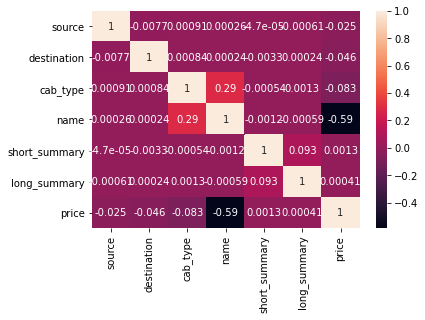

In [64]:
plt.figure
sns.heatmap(df7_encode.corr(),annot=True)

In [ ]:
# We can see only name feature that has a relatively strong correlation. 
#Source,destination, and cab_type features have relatively weak correlation
# but i will pick cab_type feature because it has stronger correlation than other two features.
#I will drop or remove the rest of the columns

In [ ]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

In [56]:
df5.columns

Index(['id', 'source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'short_summary', 'long_summary'],
      dtype='object')

In [59]:
df6=df5.drop(['id', 'source', 'destination','short_summary', 'long_summary'], axis=1)

In [60]:
df6.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

In [78]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [79]:
def one_hot_encoder(data,feature,keep_first=True):

    df8 = pd.get_dummies(data[feature])
    
    for col in df8.columns:
        df8.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    df6 = pd.concat([data,df8],axis=1)
    df6.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        df6=df6.iloc[:,1:]
    
    return df6

In [80]:
df_onehot=df6.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
346401,8.5,1.04,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
390693,27.5,1.35,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
390691,27.5,0.54,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
390690,6.5,0.54,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
390689,7.0,0.54,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [100]:
df_onehot.columns

Index(['price', 'distance', 'surge_multiplier', 'cab_type_Lyft',
       'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
X = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [83]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9266731220590335

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.3541694552582415
2.520747796836931


In [102]:
predictors = df_onehot[['price', 'distance', 'surge_multiplier', 'cab_type_Lyft',
       'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV']]

In [103]:
predictors.dropna(inplace = True)

In [104]:
#separate the other attributes from the predicting attribute
x = predictors.drop("price",axis=1)
#separte the predicting attribute into Y for model training 
y = predictors["price"]

In [105]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [106]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [107]:
y_prediction =  LR.predict(x_test)

In [108]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9262718210355712
mean_sqrd_error is== 6.402162321520985
root_mean_squared error of is== 2.530249458358006


In [109]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.424e+05
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:39:55   Log-Likelihood:            -1.4934e+06
No. Observations:              637975   AIC:                         2.987e+06
Df Residuals:                  637959   BIC:                         2.987e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.832e+09   4.25e+0